In [26]:
#Importing Necessary Libraries
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import cv2

In [27]:
tf.__version__

'2.12.0'

In [28]:
#Processing the training set
train_datagen = ImageDataGenerator(rescale= 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
train_set = train_datagen.flow_from_directory('dataset/training_set',
                                             target_size = (64,64),
                                             batch_size = 2,
                                             class_mode = 'categorical')
train_set.class_indices

Found 9 images belonging to 3 classes.


{'Jaden': 0, 'Slayde': 1, 'aston': 2}

In [29]:
#Processing the Test Set
test_datagen = ImageDataGenerator(rescale= 1./255)
test_set = train_datagen.flow_from_directory('dataset/test_set',
                                             target_size = (64,64),
                                             batch_size = 3,
                                             class_mode = 'categorical')

Found 10 images belonging to 3 classes.


In [30]:
#Building the CNN Model

cnn = tf.keras.models.Sequential()

#convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=18, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))

#Pooling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2 , strides = 2))

#Adding second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=18, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2 , strides = 2))

#Flattening
cnn.add(tf.keras.layers.Flatten())

#Full Connection
cnn.add(tf.keras.layers.Dense(units = 64 , activation = 'relu'))

#Output Layer
cnn.add(tf.keras.layers.Dense(units = 3 , activation = 'softmax'))

In [31]:
#Training the CNN Model

#compiling the cnn
cnn.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

#training the cnn on training set and evaluating it on the test set
cnn.fit(x = train_set , validation_data = test_set , epochs = 25)

Epoch 1/25


5/5 [==============================] - 1s 63ms/step - loss: 1.4854 - accuracy: 0.4444 - val_loss: 1.3105 - val_accuracy: 0.6000
Epoch 2/25
5/5 [==============================] - 0s 31ms/step - loss: 1.0899 - accuracy: 0.5556 - val_loss: 0.9040 - val_accuracy: 0.6000
Epoch 3/25
5/5 [==============================] - 0s 32ms/step - loss: 0.7498 - accuracy: 0.7778 - val_loss: 1.0127 - val_accuracy: 0.7000
Epoch 4/25
5/5 [==============================] - 0s 30ms/step - loss: 0.6831 - accuracy: 1.0000 - val_loss: 0.9736 - val_accuracy: 0.7000
Epoch 5/25
5/5 [==============================] - 0s 31ms/step - loss: 0.6727 - accuracy: 0.8889 - val_loss: 0.7174 - val_accuracy: 0.7000
Epoch 6/25
5/5 [==============================] - 0s 30ms/step - loss: 0.5330 - accuracy: 0.8889 - val_loss: 0.8550 - val_accuracy: 0.7000
Epoch 7/25
5/5 [==============================] - 0s 34ms/step - loss: 0.3708 - accuracy: 1.0000 - val_loss: 0.7629 - val_accuracy: 0.8000
Epoch 8/25
5/5 [======================

In [32]:
#making single predictions
test_image = tf.keras.utils.load_img('dataset/test_set/aston/image_1.jpg', target_size=(64,64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)

result = cnn.predict(test_image)
result_index = np.argmax(result)
train_index = train_set.class_indices
predicted_label = list(train_index.keys())[list(train_index.values()).index(result_index)]
print("Predicted label:", predicted_label)

1/1 [==============================] - 0s 66ms/step
Predicted label: Jaden


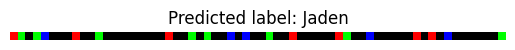

In [33]:
import matplotlib.pyplot as plt

# Display the image with the predicted label
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title("Predicted label: " + predicted_label)
plt.axis('off')
plt.show()

In [34]:
import json

with open('train_indices.json', 'w') as f:
    json.dump(train_set.class_indices, f)


!mkdir -p saved_model
cnn.save('saved_model/my_model')

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets
